In [1]:
import pandas as pd
import nltk
#nltk.download()
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

In [2]:
# Import Data
vdata = pd.read_csv('Videos_data.csv')
vdata.head(10)

,Unnamed: 0,Video Id,Title,Description,Category
0,0,ehmsJLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,1,e2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...,travel
2,2,i9E_Blai8vk,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...,travel
3,3,#NAME?,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...,travel
4,4,7ByoBJYXU0k,5 Steps to Becoming a Travel Blogger,"Travel blogger, Nikki Vargas, of The Pin the M...",travel
5,5,yvn79Rv0F48,Backpacking In Meghalaya | NorthEast India Tri...,"In this video I explored North East India, sta...",travel
6,6,SL_YBLWdZb8,Welcome to Peru! | Best Essential Tips &amp; T...,Welcome to Peru! This essential travel guide w...,travel
7,7,kiNyRY5s7n8,How to Start a Travel Blog [2019] Travel Blogg...,Create a Travel Blog Website for Just $3.95 + ...,travel
8,8,kY41XgTEEQU,A Day with KSRTC Bus Fans - Aanavandi Travel B...,ആനവണ്ടി ഭ്രാന്തൻമാരോടൊപ്പം കുമളിയിൽ ഒരു ദിവസം ...,travel
9,9,7mIzRYh8jGA,What is it like to travel in PAKISTAN?,Subscribe now: https://goo.gl/6zXZGK Watch the...,travel


In [3]:
data = vdata.drop(['Unnamed: 0'], axis = 1)

data.isnull().sum()

Video Id         0
Title            0
Description    334
Category         0
dtype: int64

In [4]:
print(data.shape)
data = data.dropna(how='any')
print(data.shape)

(10333, 4)
(9999, 4)


In [5]:
# nltk.download('stopwords')
# nltk.download('wordnet')

In [6]:
stop_words = set(stopwords.words('english'))
##Creating a list of custom stopwords
new_words = ["fig","figure","image","sample","using", 
             "show", "result", "large", 
             "also", "one", "two", "three", 
             "four", "five", "seven","eight","nine"]
stop_words = list(stop_words.union(new_words))

In [7]:
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    # remove stopwords
    text = [word for word in text if word not in stop_words]

    # remove words less than three letters
    text = [word for word in text if len(word) >= 3]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word, "v") for word in text]
    
    return ' '.join(text)

In [8]:
# The frac keyword argument specifies the fraction of rows to return in the random sample
# specifying drop=True prevents .reset_index from creating a column containing the old index entries.
data = data.sample(frac=1).reset_index(drop=True)
docs = pd.DataFrame()
docs['Title'] = data['Title'].iloc[:5000].apply(lambda x:pre_process(x))
docs['Description'] = data['Description'].iloc[:5000].apply(lambda x:pre_process(x))

In [9]:
docs.head()

,Title,Description
0,forbid history documentary astound ancient arc...,long record history advance civilization prese...
1,travel vlog krabi thailand jan kharina,blog thats take wayyyyyyy long post hope love ...
2,reason travel blog fail amp ways prevent,reason travel blog fail ways prevent feel like...
3,manhattan theatre club,dynamic leadership artistic director lynne mea...
4,roy ayers live brewhouse theatre full concert,feel free donate https www paypal fredericsche...


In [10]:
# Label encoding the classes

docs['classes'] = data['Category']
docs['classes'].value_counts()

classes
science and technology    865
food                      835
manufacturing             833
travel                    829
history                   828
art and music             810
Name: count, dtype: int64

In [11]:
# Encode classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(docs['classes'])
docs['classes'] = le.transform(docs['classes'])
docs.head()

,Title,Description,classes
0,forbid history documentary astound ancient arc...,long record history advance civilization prese...,2
1,travel vlog krabi thailand jan kharina,blog thats take wayyyyyyy long post hope love ...,5
2,reason travel blog fail amp ways prevent,reason travel blog fail ways prevent feel like...,5
3,manhattan theatre club,dynamic leadership artistic director lynne mea...,0
4,roy ayers live brewhouse theatre full concert,feel free donate https www paypal fredericsche...,0


In [24]:
le.classes_
# art and music -> 0, food -> 1, and so on.

array(['art and music', 'food', 'history', 'manufacturing',
       'science and technology', 'travel'], dtype=object)

In [13]:
docs['classes'].value_counts()

classes
4    865
1    835
3    833
5    829
2    828
0    810
Name: count, dtype: int64

In [14]:
# Vectorizing text features using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = docs['classes']
features_title = tfidf_title.fit_transform(docs['Title']).toarray()
features_description = tfidf_desc.fit_transform(docs['Description']).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (5000, 1277)
Description Features Shape: (5000, 2687)


In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = docs['Title'].values
descriptions = docs['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(docs['classes']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 16319 unique tokens.
Shape of data tensor: (5000, 50)
Shape of label tensor: (5000, 6)


In [16]:
titles[0:4]

array(['forbid history documentary astound ancient archaeology discoveries',
       'travel vlog krabi thailand jan kharina',
       'reason travel blog fail amp ways prevent',
       'manhattan theatre club'], dtype=object)

In [17]:
data_for_lstms[0:4]

['forbid history documentary astound ancient archaeology discoveries long record history advance civilization present earth clearly access advance technology thousands years',
 'travel vlog krabi thailand jan kharina blog thats take wayyyyyyy long post hope love much',
 'reason travel blog fail amp ways prevent reason travel blog fail ways prevent feel like everyone days interest travel blogger around new year',
 'manhattan theatre club dynamic leadership artistic director lynne meadow executive producer barry grove manhattan theatre club grow half']

In [18]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 100)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 1081006 (4.12 MB)
Trainable params: 1081006 (4.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [19]:
# Training LSTM Model
epochs = 10
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 16s 415ms/step - loss: 1.7632 - accuracy: 0.3390 - val_loss: 1.6440 - val_accuracy: 0.4893
Epoch 2/10
24/24 [==============================] - 8s 326ms/step - loss: 1.4158 - accuracy: 0.5607 - val_loss: 0.9496 - val_accuracy: 0.8720
Epoch 3/10
24/24 [==============================] - 8s 338ms/step - loss: 0.5109 - accuracy: 0.8707 - val_loss: 0.3342 - val_accuracy: 0.9280
Epoch 4/10
24/24 [==============================] - 8s 346ms/step - loss: 0.1245 - accuracy: 0.9730 - val_loss: 0.2226 - val_accuracy: 0.9573
Epoch 5/10
24/24 [==============================] - 8s 336ms/step - loss: 0.0495 - accuracy: 0.9913 - val_loss: 0.1712 - val_accuracy: 0.9627
Epoch 6/10
24/24 [==============================] - 8s 335ms/step - loss: 0.0295 - accuracy: 0.9967 - val_loss: 0.1457 - val_accuracy: 0.9667
Epoch 7/10
24/24 [==============================] - 8s 316ms/step - loss: 0.0177 - accuracy: 0.9987 - val_loss: 0.1169 - val_accuracy: 0.9760
Epoch

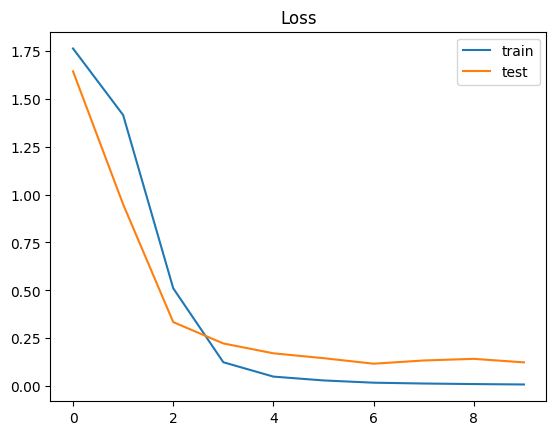

In [20]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

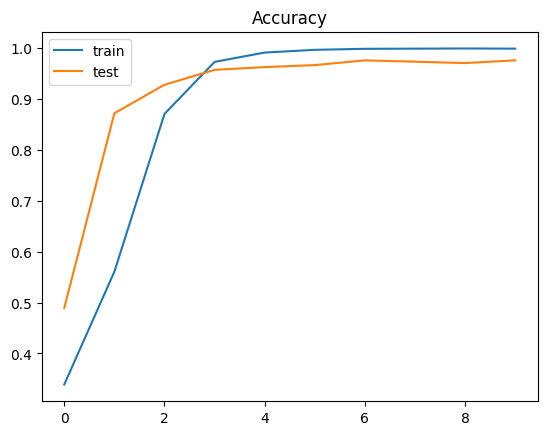

In [21]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [22]:
# Saving the tokenizer and the model:

import pickle

pickle.dump(tokenizer, open(r'C:\Users\USER\Python Files\video_classification-tokenizer.pkl', 'wb'))
model.save(r'C:\Users\USER\Python Files\video_classification-model.h5')

C:\Users\USER\anaconda3\envs\DataFrame\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
